In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.stats import uniform, norm

# 被積分関数

In [14]:
f = lambda x: norm(loc=0, scale=1).pdf(x)
h = lambda x: np.exp(-(x-3)**2/2) + np.exp(-(x-6)**2/2)
y = lambda x: h(x) * f(x)

## scipy.integrateでの積分

In [15]:
I = scipy.integrate.quad(y, -np.inf, np.inf)[0]
print('scipy.integrate:', I)

scipy.integrate: 0.0746157703288339


In [16]:
N = 2000

## 通常のモンテカルロ積分

In [17]:
x1 = norm.rvs(size=N)
I = np.mean(h(x1))
print('normal monte carlo integration:', I)

normal monte carlo integration: 0.0738331401413


## 重点サンプリングによるモンテカルロ積分
- 被積分領域の範囲を覆うような一様分布を重点関数とする

In [18]:
a, b = 0, 3
u = uniform(loc=a, scale=b-a)
g = lambda x: u.pdf(x)
x2 = u.rvs(size=N)
I = np.mean(f(x2) / g(x2) * h(x2))
print('importance sampling:', I)

importance sampling: 0.0726155775078


## グラフの描画

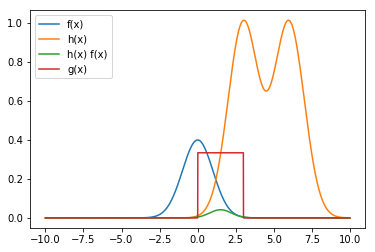

In [19]:
ix = np.arange(-10, 10, 0.01)
plt.plot(ix, f(ix), label='f(x)')
plt.plot(ix, h(ix), label='h(x)')
plt.plot(ix, y(ix), label='h(x) f(x)')
plt.plot(ix, g(ix), label='g(x)')
plt.legend(loc='best')
plt.show()

## 2つの手法の収束の様子を比較

In [20]:
plt.subplot(211)
x1 = h(x1)
estint = np.cumsum(x1) / np.arange(1, N + 1)
esterr = np.sqrt(np.cumsum((x2 - estint) ** 2)) / np.arange(1, N + 1)
plt.plot(estint, color='red', linewidth=2)
plt.plot(estint + 2 * esterr, color='gray')
plt.plot(estint - 2 * esterr, color='gray')
plt.title('convergence (normal monte carlo integration)')
plt.ylim((0.0, 0.2))

(0.0, 0.2)

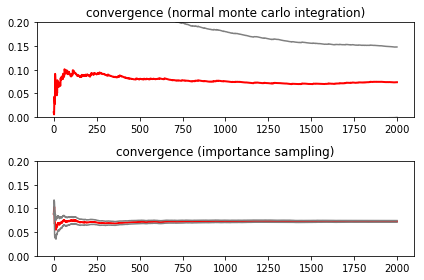

In [21]:
plt.subplot(212)
x2 = f(x2) / g(x2) * h(x2)
estint = np.cumsum(x2) / np.arange(1, N + 1)
esterr = np.sqrt(np.cumsum((x2 - estint) ** 2)) / np.arange(1, N + 1)
plt.plot(estint, color='red', linewidth=2)
plt.plot(estint + 2 * esterr, color='gray')
plt.plot(estint - 2 * esterr, color='gray')
plt.title('convergence (importance sampling)')
plt.ylim((0.0, 0.2))

plt.tight_layout()
plt.show()